# Introduction to nibabel

## BrainHack Global 2018 Leipzig  

This package provides read +/- write access to some common medical and neuroimaging file formats, including: ANALYZE (plain, SPM99, SPM2 and later), GIFTI, NIfTI1, NIfTI2, MINC1, MINC2, MGH and ECAT as well as Philips PAR/REC. We can read and write FreeSurfer geometry, annotation and morphometry files. There is some very limited support for DICOM. NiBabel is the successor of PyNIfTI.

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# basic I/O
epi_img = nib.load('../data/someones_epi.nii.gz')

In [3]:
epi_img_data = epi_img.get_data()

In [4]:
epi_img_data.shape

(53, 61, 33)

In [5]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

Text(0.5,0.98,'Center slices for EPI image')

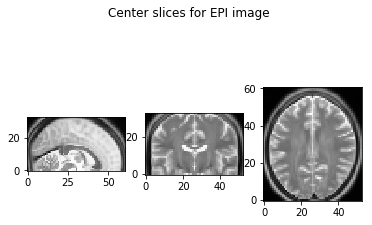

In [6]:
slice_0 = epi_img_data[26, :, :]
slice_1 = epi_img_data[:, 30, :]
slice_2 = epi_img_data[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image") 

In [7]:
anat_img = nib.load('../data/someones_anatomy.nii.gz')

In [8]:
anat_img_data = anat_img.get_data()

In [9]:
anat_img_data.shape

(57, 67, 56)

Text(0.5,0.98,'Center slices for anatomical image')

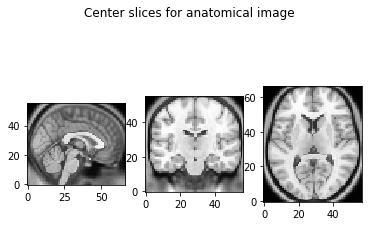

In [10]:
show_slices([anat_img_data[28, :, :],
             anat_img_data[:, 33, :],
             anat_img_data[:, :, 28]])
plt.suptitle("Center slices for anatomical image")

In [11]:
# Nibabel's affine are in RAS+ convention coordinate system
# Meaning that axis 0 is Right-Left with R in the +
# Meaning that axis 1 is Anterior-Posterior with A in the +
# Meaning that axis 2 is Superior-Inferior with S in the +
epi_img.affine

array([[  3.        ,   0.        ,   0.        , -78.        ],
       [  0.        ,   2.86600947,  -0.88656062, -76.        ],
       [  0.        ,   0.88656062,   2.86600947, -64.        ],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [12]:
anat_img.affine

array([[  2.75,   0.  ,   0.  , -78.  ],
       [  0.  ,   2.75,   0.  , -91.  ],
       [  0.  ,   0.  ,   2.75, -91.  ],
       [  0.  ,   0.  ,   0.  ,   1.  ]])

In [13]:
print(epi_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 53 61 33  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 3. 3. 3. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.14943813
quatern_c       : -0.0
quatern_d       : -0.0
qoffset_x       : -78.0
qoffset_y       : -76.0
qoffset_z       : -64.0
srow_x          : [  3.   0.   0. -78.]
srow_y          : [

In [14]:
newarray = np.random.rand(*epi_img_data.shape)

In [15]:
newarray.shape

(53, 61, 33)

In [16]:
newimage_epi = nib.Nifti1Image(newarray.astype(np.float32), affine = epi_img.affine)

In [17]:
nib.save(newimage_epi, '../data/newdata.nii.gz')